In [1]:
#importing basic libraries for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the dataset
credit_risk=pd.read_csv(r"D:\Downloads\archive\credit_risk_dataset.csv")
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#shape of the imported dataset
credit_risk.shape

(32581, 12)

In [4]:
#statistical measures of the dataset 
#describe gives us the statistics of the numeric columns and not for the categorical columns thats why out of 12 columns i shows us 8
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Data Preparation

In [5]:
#creating a copy of the original data
credit_risk_copy=credit_risk.copy()

In [6]:
#Data aggregation and transformation
#pivot table organized the loan data by person age and loan status
credit_risk.pivot_table(index='person_age',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_age',ascending=False)

loan_status,person_age,0,1
57,144,3.0,NaN
56,123,2.0,NaN
55,94,1.0,NaN
54,84,1.0,NaN
53,80,1.0,NaN
52,78,1.0,NaN
51,76,1.0,NaN
50,73,3.0,NaN
49,70,5.0,2.0
48,69,5.0,NaN


In [7]:
#to reduce the possibility of default risk by removing the people from the list who are over the age of 70
cr_age_rmvd=credit_risk[credit_risk['person_age']<=70]
cr_age_rmvd.reset_index(drop=True, inplace=True)
cr_age_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
#pivot table organized the loan data by person emp length and loan status
cr_age_rmvd.pivot_table(index='person_emp_length',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_emp_length',ascending=False)

loan_status,person_emp_length,0,1
34,123.0,1.0,1.0
33,38.0,1.0,NaN
32,34.0,NaN,1.0
31,31.0,4.0,NaN
30,30.0,1.0,1.0
29,29.0,NaN,1.0
28,28.0,3.0,NaN
27,27.0,4.0,1.0
26,26.0,5.0,1.0
25,25.0,8.0,NaN


In [9]:
#to reduce the possibility of default risk by removing the people from the list who have atmost of 47 years of employment length 
person_emp_rmvd=cr_age_rmvd[cr_age_rmvd['person_emp_length']<=47]
person_emp_rmvd.reset_index(drop=True, inplace=True)
person_emp_rmvd.head() 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [10]:
person_emp_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,28626.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.040070,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.229507,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## EDA- Exploratory Data Analysis

In [11]:
#Checking for missing values
person_emp_rmvd.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3045
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
cr_data=person_emp_rmvd.copy()

In [13]:
cr_data.fillna({'loan_int_rate':cr_data['loan_int_rate'].median()},inplace=True)

In [14]:
cr_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
cr_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.035256,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.070364,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [16]:
#identify datatypes
cr_data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [17]:
sns.set(style="whitegrid")

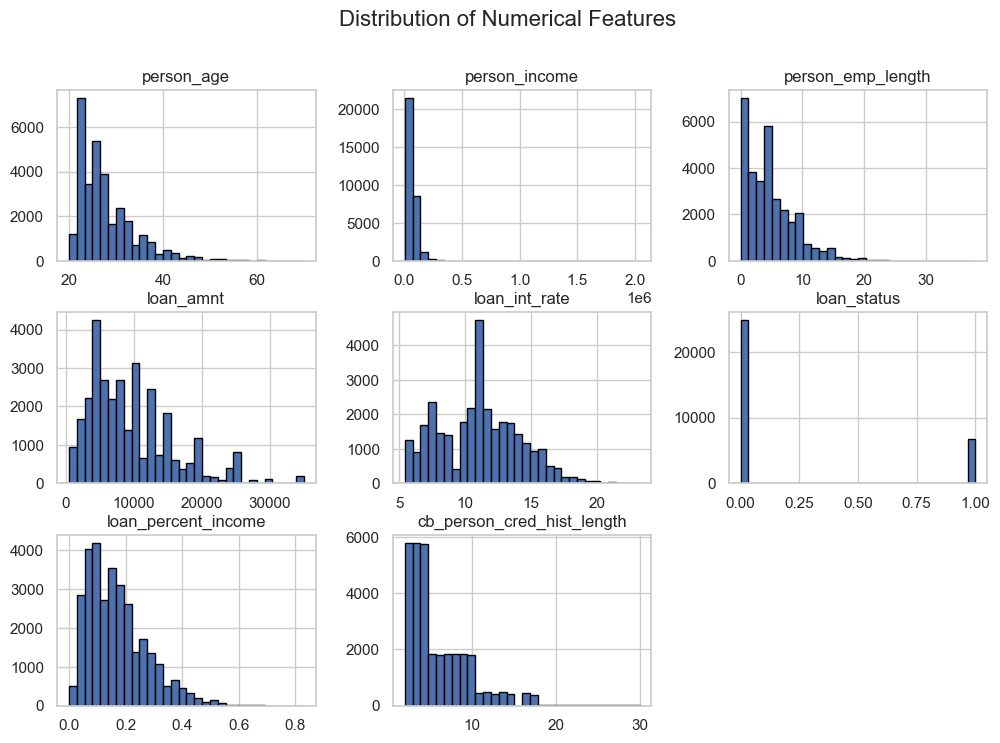

In [18]:
cr_data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

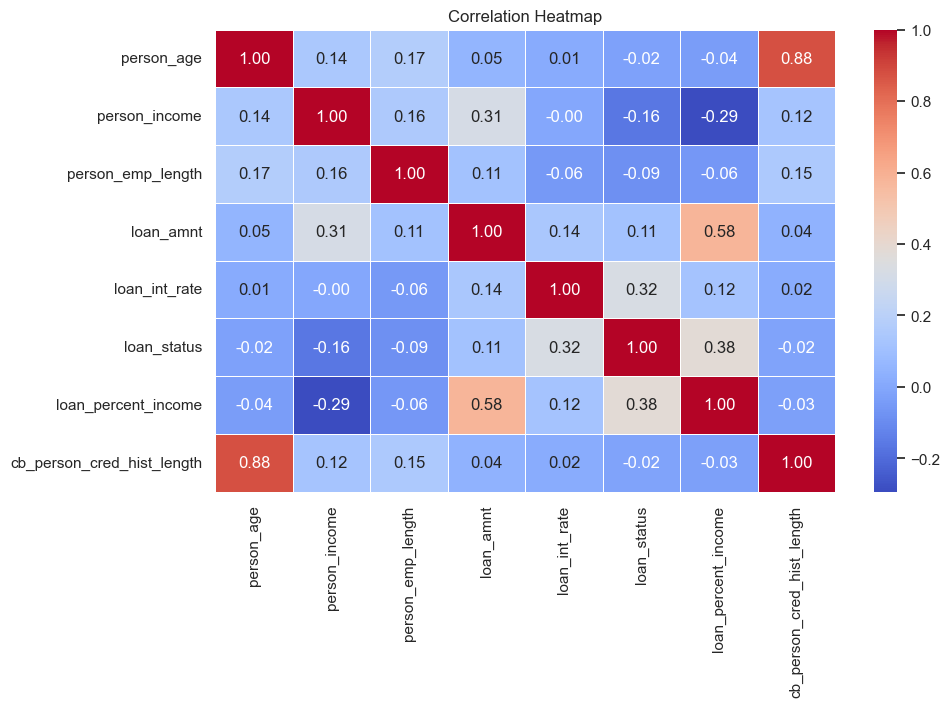

In [19]:
#since there are chategorical variables in the data, correlations heatmaps cannot be used so only the numerical data has been included for this heatmap 
numeric_data = cr_data.select_dtypes(include=['number']) 
#Correlation matrix
correlation_matrix=numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
#finding the no.of records we have
cr_data.groupby('loan_status').count()['person_age']

loan_status
0    24846
1     6825
Name: person_age, dtype: int64

In [21]:
6825/(6825+24846)

0.21549682675002368

$\approx$21% of the data is positive
so, lets say that20% of the data is positive and the rest 80% is negative 
this is obviously not a balanced data
if the records are 50% to 50% - then this is balanced data, even 40 to 60 is considered balanced data.

In [22]:
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [23]:
cr_data.groupby('person_home_ownership').count()['loan_intent']

person_home_ownership
MORTGAGE    13088
OTHER         107
OWN          2410
RENT        16066
Name: loan_intent, dtype: int64

In [24]:
cr_data.groupby('loan_intent').count()['person_home_ownership']

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5891
PERSONAL             5365
VENTURE              5553
Name: person_home_ownership, dtype: int64

In [25]:
cr_data.groupby('loan_grade').count()['person_home_ownership']

loan_grade
A    10365
B    10181
C     6318
D     3555
E      952
F      236
G       64
Name: person_home_ownership, dtype: int64

In [26]:
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [27]:
#dropping the loan_grade
cr_data_copy=cr_data.drop('loan_grade',axis=1)

In [28]:
display(cr_data_copy.shape)
display(cr_data_copy.head())

(31671, 11)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


#### Categorical Features Treatment

##### one-hot encoding
Since machine learning models can't understand text, we need to convert these into numbers.
but instead of assigning numbers directly, one-hot encoding creates new columns for each category with 0s and 1s to indicate presence.

In [29]:
cr_data_cat_treated=cr_data_copy.copy()

In [30]:
cr_data_cat_treated.groupby('person_home_ownership').count()['person_age']

person_home_ownership
MORTGAGE    13088
OTHER         107
OWN          2410
RENT        16066
Name: person_age, dtype: int64

In [31]:
cr_data_cat_treated.groupby('loan_intent').count()['person_age']

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5891
PERSONAL             5365
VENTURE              5553
Name: person_age, dtype: int64

In [32]:
cr_data_cat_treated.groupby('cb_person_default_on_file').count()['person_age']

cb_person_default_on_file
N    26043
Y     5628
Name: person_age, dtype: int64

In [33]:
person_home_ownership=pd.get_dummies(cr_data_cat_treated['person_home_ownership'],drop_first=True).astype(int)
loan_intent=pd.get_dummies(cr_data_cat_treated['loan_intent'],drop_first=True).astype(int)
loan_intent.head()
#one-hot encoding

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [34]:
cr_data_cat_treated['cb_person_default_on_file_binary']=np.where(cr_data_cat_treated['cb_person_default_on_file']=='Y',1,0)
cr_data_cat_treated.head()
#just like if-else statement-if 'Y' is present print 1 or else print 0

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [35]:
person_home_ownership.head()

,OTHER,OWN,RENT
0,0,1,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,1,0


## UpScaling

In [36]:
data_to_scale = cr_data_cat_treated.drop(['person_home_ownership','loan_intent','loan_status','cb_person_default_on_file','cb_person_default_on_file_binary'],axis=1)

In [37]:
data_to_scale.head()
#the following are the only columns thatare going to be scalled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


In [38]:
scaler=StandardScaler()

In [39]:
data_to_scale.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [40]:
scaled_data=scaler.fit_transform(data_to_scale)
scaled_df=pd.DataFrame(scaled_data,columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
scaled_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656


In [41]:
scaled_df.shape

(31671, 7)

In [42]:
cr_data_cat_treated.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [43]:
scaled_data_combined=pd.concat([scaled_df,person_home_ownership,loan_intent],axis=1)
scaled_data_combined.shape

(31671, 15)

In [44]:
scaled_data_combined=pd.concat([scaled_df,person_home_ownership,loan_intent],axis=1)
scaled_data_combined['cb_person_default_on_file']=cr_data_cat_treated['cb_person_default_on_file_binary']
scaled_data_combined['loan_status']=cr_data_cat_treated['loan_status']
scaled_data_combined.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_status
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0,1
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0,1
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0,1


In [45]:
scaled_data_combined.groupby('loan_status').count()['EDUCATION']

loan_status
0    24846
1     6825
Name: EDUCATION, dtype: int64

In [46]:
6825/(6825+24846)

0.21549682675002368

In [47]:
#splitting of the data
target=scaled_data_combined['loan_status']
features=scaled_data_combined.drop('loan_status',axis=1)
features.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0


#### Balancing the data

SMOTE-Synthetic Minority Over-Sampling Technique
SMOTE - Synthetic Minority Over-sampling Technique is a method used in machine learning to fix imbalanced datasets by creating new (synthetic) samples for the minority class instead of just duplicating existing ones.

In [48]:
#pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
#creating an instance 
smote=SMOTE()

In [51]:
#define features and target variable
balanced_features,balanced_target=smote.fit_resample(features,target)

C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [52]:
scaled_data_combined.groupby('loan_status').size()

loan_status
0    24846
1     6825
dtype: int64

In [53]:
#checking class distribution after balancing
balanced_target_df=pd.DataFrame({'target':balanced_target})
balanced_target_df.groupby('target').size()

target
0    24846
1    24846
dtype: int64

## Models Training 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [55]:
#splitting Data for Training and Testing
x_train, x_test, y_train, y_test = train_test_split(balanced_features, balanced_target, test_size=0.20,random_state=42)

In [56]:
#nitializing logistic regression model
logit=LogisticRegression()

In [57]:
#training the logistic regression model
logit.fit(x_train,y_train)

LogisticRegression()

In [58]:
import pickle

In [59]:
#saving the trained logistic regression model
with open('logisticPDmodel.pkl','wb')as file:
    pickle.dump(logit,file)

In [60]:
#evaluating the model accuracy on training data
logit.score(x_train,y_train)

0.7827836892813121

In [61]:
#Making predictions
logit_prediction = logit.predict(x_test)
logit_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
#generating classification report
print(classification_report(y_test,logit_prediction))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4995
           1       0.78      0.77      0.78      4944

    accuracy                           0.78      9939
   macro avg       0.78      0.78      0.78      9939
weighted avg       0.78      0.78      0.78      9939



In [63]:
#retrieving model coefficients
print(logit.coef_[0])

[-0.06161305  0.06382539 -0.05102073 -0.66058807  0.98809771  1.38793221
  0.01501909 -0.56048824 -2.07742756  0.45847664 -1.21041387 -0.35593621
 -0.54647357 -1.02800856 -1.51754182  0.07121056]


In [64]:
#analyzing feature importance in logistic regression
features_imp_logit=pd.DataFrame({'features':balanced_features.columns,'logit_imp':logit.coef_[0]})
features_imp_logit.sort_values(by='logit_imp',ascending=False)

,features,logit_imp
5,loan_percent_income,1.387932
4,loan_int_rate,0.988098
9,RENT,0.458477
15,cb_person_default_on_file,0.071211
1,person_income,0.063825
6,cb_person_cred_hist_length,0.015019
2,person_emp_length,-0.051021
0,person_age,-0.061613
11,HOMEIMPROVEMENT,-0.355936
12,MEDICAL,-0.546474


### RandomForest

In [65]:
#initializing random forest model
rf=RandomForestClassifier()

In [66]:
#training the random forest model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
#saving the trained random forest model
with open('RandomForestPDmodel.pkl','wb') as file:
    pickle.dump(rf,file)

In [68]:
#evaluating the model accuracy on training data
rf.score(x_train,y_train)

1.0

In [69]:
#make predictions
rf_prediction=rf.predict(x_test)
rf_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [70]:
#generating classification report for random forest model
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4995
           1       0.96      0.91      0.93      4944

    accuracy                           0.94      9939
   macro avg       0.94      0.94      0.94      9939
weighted avg       0.94      0.94      0.94      9939



In [71]:
#extracting feature importance from random forest
rf.feature_importances_

array([0.06141774, 0.14807113, 0.07175812, 0.07800062, 0.20986983,
       0.20978923, 0.06348811, 0.00043981, 0.02010009, 0.04976709,
       0.01459254, 0.01656293, 0.00876852, 0.01278597, 0.01718465,
       0.01740363])

In [72]:
#analyzing feature importance in random forest
features_imp_rf=pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})
features_imp_rf.sort_values(by='rf_imp',ascending=False)

,features,rf_imp
4,loan_int_rate,0.209870
5,loan_percent_income,0.209789
1,person_income,0.148071
3,loan_amnt,0.078001
2,person_emp_length,0.071758
6,cb_person_cred_hist_length,0.063488
0,person_age,0.061418
9,RENT,0.049767
8,OWN,0.020100
15,cb_person_default_on_file,0.017404


### XgBoost Model

In [73]:
#initializing XGBoost model
xgb_model=XGBClassifier(tree_method='exact')

In [74]:
#training the XGBoost model
xgb_model.fit(x_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
#saving the trained XGBoost model
with open('xgbPDmodel.pkl','wb') as file:
    pickle.dump(xgb_model,file)

In [76]:
##evaluating the model accuracy on training data
xgb_model.score(x_train,y_train.values.ravel())

0.9653611048222775

In [77]:
#make predictions
xgb_prediction=xgb_model.predict(x_test)
xgb_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [78]:
##generating classification report for XGBoost model
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4995
           1       0.98      0.91      0.94      4944

    accuracy                           0.95      9939
   macro avg       0.95      0.95      0.95      9939
weighted avg       0.95      0.95      0.95      9939



In [79]:
#comparing feature importances from rf and XGBoost
features_imp_rf=pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})
features_imp_xgb=pd.DataFrame({'features':balanced_features.columns,'xgb_imp':xgb_model.feature_importances_})
features_imp_xgb.sort_values(by='xgb_imp',ascending=False)

,features,xgb_imp
8,OWN,0.182611
5,loan_percent_income,0.121405
9,RENT,0.120601
14,VENTURE,0.090911
6,cb_person_cred_hist_length,0.071425
4,loan_int_rate,0.070971
11,HOMEIMPROVEMENT,0.064673
10,EDUCATION,0.058910
2,person_emp_length,0.051601
13,PERSONAL,0.048569


In [80]:
#combining feature importances from all models
features_imp=pd.concat([features_imp_logit, features_imp_rf, features_imp_xgb],axis=1)
features_imp

,features,logit_imp,features,rf_imp,features,xgb_imp
0,person_age,-0.061613,person_age,0.061418,person_age,0.034296
1,person_income,0.063825,person_income,0.148071,person_income,0.037371
2,person_emp_length,-0.051021,person_emp_length,0.071758,person_emp_length,0.051601
3,loan_amnt,-0.660588,loan_amnt,0.078001,loan_amnt,0.010484
4,loan_int_rate,0.988098,loan_int_rate,0.209870,loan_int_rate,0.070971
5,loan_percent_income,1.387932,loan_percent_income,0.209789,loan_percent_income,0.121405
6,cb_person_cred_hist_length,0.015019,cb_person_cred_hist_length,0.063488,cb_person_cred_hist_length,0.071425
7,OTHER,-0.560488,OTHER,0.000440,OTHER,0.005620
8,OWN,-2.077428,OWN,0.020100,OWN,0.182611
9,RENT,0.458477,RENT,0.049767,RENT,0.120601


### Further Exploration

In [81]:
#creating dataFrames for model predictions
xgb_prediction_df=pd.DataFrame({'test_indices_xgb':x_test.index,'xgb_pred':xgb_prediction})
rf_prediction_df=pd.DataFrame({'test_indices_rf':x_test.index,'rf_pred':rf_prediction})
logit_prediction_df=pd.DataFrame({'test_indices_logit':x_test.index,'logit_pred':logit_prediction})

In [82]:
xgb_prediction_df.head()

,test_indices_xgb,xgb_pred
0,24808,0
1,9935,0
2,14054,0
3,147,0
4,4070,1


In [83]:
rf_prediction_df.head()

,test_indices_rf,rf_pred
0,24808,0
1,9935,0
2,14054,0
3,147,0
4,4070,1


In [84]:
logit_prediction_df.head()

,test_indices_logit,logit_pred
0,24808,0
1,9935,0
2,14054,0
3,147,0
4,4070,0


In [85]:
#merging predictions with original data
merged_with_orig=cr_data_copy.merge(xgb_prediction_df,left_index=True,right_on='test_indices_xgb',how='left')
merged_with_orig.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_pred
NaN,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,NaN
9831.0,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0
NaN,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,2,NaN
NaN,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,3,NaN
442.0,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,4,1.0


In [86]:
#merging rd predictions with data
merged_with_rf=merged_with_orig.merge(rf_prediction_df,left_index=True,right_on='test_indices_rf',how='left')
merged_with_rf.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_pred,test_indices_rf,rf_pred
NaN,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,NaN,NaN,NaN
NaN,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0,9831.0,NaN
NaN,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,2,NaN,NaN,NaN
NaN,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,3,NaN,NaN,NaN
NaN,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,4,1.0,442.0,NaN


In [87]:
#merging final model predictions
merged_with_final=merged_with_rf.merge(logit_prediction_df,left_index=True,right_on='test_indices_logit',how='left')
merged_with_final.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_pred,test_indices_rf,rf_pred,test_indices_logit,logit_pred
NaN,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0,NaN,NaN,NaN,NaN,NaN
NaN,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,1,1.0,9831.0,NaN,NaN,NaN
NaN,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,2,NaN,NaN,NaN,NaN,NaN
NaN,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,3,NaN,NaN,NaN,NaN,NaN
NaN,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,4,1.0,442.0,NaN,NaN,NaN


In [88]:
merged_with_final.shape

(31671, 17)

In [89]:
#removing missing values from final dataset
merged_with_final.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_pred,test_indices_rf,rf_pred,test_indices_logit,logit_pred
7782.0,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4,6,1.0,5893.0,0.0,8675.0,1.0
7968.0,25,12600,OWN,3.0,PERSONAL,1750,13.61,0,0.14,N,3,103,0.0,3308.0,1.0,3755.0,0.0
9251.0,22,153000,MORTGAGE,5.0,DEBTCONSOLIDATION,24000,15.62,1,0.16,Y,2,341,1.0,2116.0,1.0,2186.0,0.0
5662.0,22,16094,MORTGAGE,2.0,VENTURE,5500,7.14,1,0.34,N,3,351,1.0,3229.0,0.0,9057.0,1.0
143.0,21,18000,OWN,1.0,PERSONAL,2500,11.36,0,0.14,N,3,454,0.0,1442.0,1.0,9313.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8797.0,36,261800,MORTGAGE,16.0,MEDICAL,24000,10.62,1,0.08,N,16,31019,0.0,7738.0,1.0,8538.0,1.0
2707.0,42,85000,RENT,3.0,MEDICAL,5750,12.99,0,0.07,Y,14,31053,0.0,9389.0,0.0,8530.0,0.0
6085.0,52,64500,RENT,0.0,PERSONAL,5000,11.26,0,0.08,N,25,31488,0.0,7891.0,1.0,252.0,1.0
4867.0,58,68000,MORTGAGE,1.0,PERSONAL,8000,10.99,0,0.12,N,29,31553,0.0,7132.0,0.0,5367.0,0.0


In [90]:
#removing missing values in-place
merged_with_final.dropna(inplace=True)

In [91]:
merged_with_final.shape

(273, 17)

In [92]:
merged_with_final.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,test_indices_xgb,xgb_pred,test_indices_rf,rf_pred,test_indices_logit,logit_pred
7782.0,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4,6,1.0,5893.0,0.0,8675.0,1.0
7968.0,25,12600,OWN,3.0,PERSONAL,1750,13.61,0,0.14,N,3,103,0.0,3308.0,1.0,3755.0,0.0
9251.0,22,153000,MORTGAGE,5.0,DEBTCONSOLIDATION,24000,15.62,1,0.16,Y,2,341,1.0,2116.0,1.0,2186.0,0.0
5662.0,22,16094,MORTGAGE,2.0,VENTURE,5500,7.14,1,0.34,N,3,351,1.0,3229.0,0.0,9057.0,1.0
143.0,21,18000,OWN,1.0,PERSONAL,2500,11.36,0,0.14,N,3,454,0.0,1442.0,1.0,9313.0,0.0


In [93]:
#removing index columns from final data
final_data_with_pred=merged_with_final.drop(['test_indices_xgb','test_indices_rf','test_indices_logit'],axis=1)
final_data_with_pred.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,xgb_pred,rf_pred,logit_pred
7782.0,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4,1.0,0.0,1.0
7968.0,25,12600,OWN,3.0,PERSONAL,1750,13.61,0,0.14,N,3,0.0,1.0,0.0
9251.0,22,153000,MORTGAGE,5.0,DEBTCONSOLIDATION,24000,15.62,1,0.16,Y,2,1.0,1.0,0.0
5662.0,22,16094,MORTGAGE,2.0,VENTURE,5500,7.14,1,0.34,N,3,1.0,0.0,1.0
143.0,21,18000,OWN,1.0,PERSONAL,2500,11.36,0,0.14,N,3,0.0,1.0,0.0


In [94]:
#exporting final predictions to excel
final_data_with_pred.to_excel(r"D:\Python\pd_prediction.04.xlsx",index=False)

In [95]:
#evaluate XGBoost model performance
print(classification_report(final_data_with_pred['loan_status'],final_data_with_pred['xgb_pred']))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       210
           1       0.90      0.75      0.82        63

    accuracy                           0.92       273
   macro avg       0.92      0.86      0.88       273
weighted avg       0.92      0.92      0.92       273



In [96]:
from sklearn.metrics import confusion_matrix 

In [97]:
confusion_matrix(final_data_with_pred['loan_status'],final_data_with_pred['xgb_pred'])

array([[205,   5],
       [ 16,  47]], dtype=int64)

In [98]:
print(classification_report(final_data_with_pred['loan_status'],final_data_with_pred['rf_pred']))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       210
           1       0.27      0.30      0.28        63

    accuracy                           0.65       273
   macro avg       0.52      0.53      0.53       273
weighted avg       0.66      0.65      0.66       273



In [102]:
confusion_matrix(final_data_with_pred['loan_status'],final_data_with_pred['rf_pred'])

array([[158,  52],
       [ 44,  19]], dtype=int64)

In [101]:
print(classification_report(final_data_with_pred['loan_status'],final_data_with_pred['logit_pred']))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       210
           1       0.22      0.38      0.28        63

    accuracy                           0.55       273
   macro avg       0.49      0.49      0.47       273
weighted avg       0.64      0.55      0.58       273



In [103]:
confusion_matrix(final_data_with_pred['loan_status'],final_data_with_pred['logit_pred'])

array([[125,  85],
       [ 39,  24]], dtype=int64)